## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  88.514079  1085.589085  0.807143   5.294106  1.500188
1  52.752141   699.504934  0.228508   7.668302  1.327732
2  37.381156   373.707128  0.866129   2.385753  1.451759
3  80.832457   741.332138  0.737159  10.042015  1.224556
4  64.209845   570.135401  0.126604   7.225397  0.760069


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.28193 | train_mse: 6.32744 | train_mae: 1.61718 |  0:00:00s
epoch 1  | loss: 0.61016 | train_mse: 7.71496 | train_mae: 1.84496 |  0:00:00s
epoch 2  | loss: 0.47898 | train_mse: 7.01015 | train_mae: 1.82775 |  0:00:00s


epoch 3  | loss: 0.79596 | train_mse: 6.33418 | train_mae: 1.633   |  0:00:00s
epoch 4  | loss: 0.6703  | train_mse: 2.10533 | train_mae: 1.00138 |  0:00:00s
epoch 5  | loss: 0.65958 | train_mse: 1.70221 | train_mae: 0.91412 |  0:00:00s


epoch 6  | loss: 0.63125 | train_mse: 1.98344 | train_mae: 0.97256 |  0:00:00s
epoch 7  | loss: 0.47626 | train_mse: 1.94808 | train_mae: 0.98541 |  0:00:00s
epoch 8  | loss: 0.38196 | train_mse: 1.34519 | train_mae: 0.82363 |  0:00:00s


epoch 9  | loss: 0.36447 | train_mse: 0.96255 | train_mae: 0.66682 |  0:00:00s
epoch 10 | loss: 0.29416 | train_mse: 0.75652 | train_mae: 0.61115 |  0:00:01s
epoch 11 | loss: 0.42748 | train_mse: 0.51012 | train_mae: 0.53776 |  0:00:01s


epoch 12 | loss: 0.28423 | train_mse: 0.48111 | train_mae: 0.50163 |  0:00:01s
epoch 13 | loss: 0.32537 | train_mse: 0.44986 | train_mae: 0.498   |  0:00:01s
epoch 14 | loss: 0.37318 | train_mse: 0.46551 | train_mae: 0.50733 |  0:00:01s


epoch 15 | loss: 0.35698 | train_mse: 0.38635 | train_mae: 0.47474 |  0:00:01s
epoch 16 | loss: 0.24751 | train_mse: 0.3296  | train_mae: 0.43461 |  0:00:01s
epoch 17 | loss: 0.25675 | train_mse: 0.34055 | train_mae: 0.41686 |  0:00:01s


epoch 18 | loss: 0.24462 | train_mse: 0.54337 | train_mae: 0.47783 |  0:00:01s
epoch 19 | loss: 0.26872 | train_mse: 0.77565 | train_mae: 0.55145 |  0:00:01s
epoch 20 | loss: 0.41494 | train_mse: 0.82226 | train_mae: 0.53765 |  0:00:01s


epoch 21 | loss: 0.62648 | train_mse: 0.31331 | train_mae: 0.40714 |  0:00:01s
epoch 22 | loss: 0.29375 | train_mse: 0.20799 | train_mae: 0.33246 |  0:00:01s
epoch 23 | loss: 0.26291 | train_mse: 0.20607 | train_mae: 0.34069 |  0:00:02s


epoch 24 | loss: 0.36481 | train_mse: 0.21342 | train_mae: 0.36326 |  0:00:02s
epoch 25 | loss: 0.20808 | train_mse: 0.2643  | train_mae: 0.39307 |  0:00:02s
epoch 26 | loss: 0.26817 | train_mse: 0.2454  | train_mae: 0.36673 |  0:00:02s


epoch 27 | loss: 0.1905  | train_mse: 0.25741 | train_mae: 0.37517 |  0:00:02s
epoch 28 | loss: 0.30401 | train_mse: 0.18277 | train_mae: 0.32666 |  0:00:02s
epoch 29 | loss: 0.22524 | train_mse: 0.17    | train_mae: 0.3351  |  0:00:02s


epoch 30 | loss: 0.29126 | train_mse: 0.15856 | train_mae: 0.31777 |  0:00:02s
epoch 31 | loss: 0.2121  | train_mse: 0.19995 | train_mae: 0.35632 |  0:00:02s
epoch 32 | loss: 0.25891 | train_mse: 0.15494 | train_mae: 0.32029 |  0:00:02s
epoch 33 | loss: 0.18997 | train_mse: 0.1648  | train_mae: 0.33495 |  0:00:02s


epoch 34 | loss: 0.40633 | train_mse: 0.15692 | train_mae: 0.32789 |  0:00:02s
epoch 35 | loss: 0.32417 | train_mse: 0.16176 | train_mae: 0.33004 |  0:00:02s
epoch 36 | loss: 0.20067 | train_mse: 0.16664 | train_mae: 0.32299 |  0:00:03s


epoch 37 | loss: 0.21658 | train_mse: 0.16387 | train_mae: 0.32117 |  0:00:03s
epoch 38 | loss: 0.19187 | train_mse: 0.15421 | train_mae: 0.31142 |  0:00:03s


epoch 39 | loss: 0.22099 | train_mse: 0.15697 | train_mae: 0.31417 |  0:00:03s
epoch 40 | loss: 0.27829 | train_mse: 0.15229 | train_mae: 0.31234 |  0:00:03s
epoch 41 | loss: 0.23162 | train_mse: 0.1509  | train_mae: 0.30901 |  0:00:03s


epoch 42 | loss: 0.12508 | train_mse: 0.14747 | train_mae: 0.30299 |  0:00:03s
epoch 43 | loss: 0.1892  | train_mse: 0.13956 | train_mae: 0.29055 |  0:00:03s


epoch 44 | loss: 0.29032 | train_mse: 0.1666  | train_mae: 0.32593 |  0:00:04s


epoch 45 | loss: 0.16476 | train_mse: 0.14609 | train_mae: 0.31294 |  0:00:04s
epoch 46 | loss: 0.17351 | train_mse: 0.13621 | train_mae: 0.2958  |  0:00:04s


epoch 47 | loss: 0.18471 | train_mse: 0.137   | train_mae: 0.29068 |  0:00:04s
epoch 48 | loss: 0.15436 | train_mse: 0.12333 | train_mae: 0.28353 |  0:00:04s
epoch 49 | loss: 0.18312 | train_mse: 0.11443 | train_mae: 0.26929 |  0:00:04s


epoch 50 | loss: 0.2267  | train_mse: 0.12573 | train_mae: 0.28659 |  0:00:05s
epoch 51 | loss: 0.24614 | train_mse: 0.14878 | train_mae: 0.31523 |  0:00:05s
epoch 52 | loss: 0.17364 | train_mse: 0.13763 | train_mae: 0.31022 |  0:00:05s


epoch 53 | loss: 0.18377 | train_mse: 0.10684 | train_mae: 0.27169 |  0:00:05s
epoch 54 | loss: 0.14448 | train_mse: 0.10564 | train_mae: 0.2648  |  0:00:05s
epoch 55 | loss: 0.21086 | train_mse: 0.12054 | train_mae: 0.28141 |  0:00:05s


epoch 56 | loss: 0.14181 | train_mse: 0.13425 | train_mae: 0.29323 |  0:00:05s


epoch 57 | loss: 0.23493 | train_mse: 0.12743 | train_mae: 0.28088 |  0:00:05s
epoch 58 | loss: 0.24989 | train_mse: 0.13257 | train_mae: 0.29155 |  0:00:06s


epoch 59 | loss: 0.17873 | train_mse: 0.14307 | train_mae: 0.30348 |  0:00:06s
epoch 60 | loss: 0.22867 | train_mse: 0.16819 | train_mae: 0.32141 |  0:00:06s


epoch 61 | loss: 0.2961  | train_mse: 0.20352 | train_mae: 0.33483 |  0:00:06s


epoch 62 | loss: 0.24799 | train_mse: 0.1531  | train_mae: 0.30406 |  0:00:06s
epoch 63 | loss: 0.15435 | train_mse: 0.14079 | train_mae: 0.30387 |  0:00:07s


epoch 64 | loss: 0.12397 | train_mse: 0.14653 | train_mae: 0.30705 |  0:00:07s
epoch 65 | loss: 0.20334 | train_mse: 0.11445 | train_mae: 0.2714  |  0:00:07s


epoch 66 | loss: 0.1465  | train_mse: 0.11262 | train_mae: 0.27186 |  0:00:07s
epoch 67 | loss: 0.13126 | train_mse: 0.10551 | train_mae: 0.26054 |  0:00:07s


epoch 68 | loss: 0.1846  | train_mse: 0.11519 | train_mae: 0.27782 |  0:00:07s
epoch 69 | loss: 0.15499 | train_mse: 0.12182 | train_mae: 0.28315 |  0:00:07s


epoch 70 | loss: 0.15523 | train_mse: 0.09822 | train_mae: 0.25218 |  0:00:07s
epoch 71 | loss: 0.17889 | train_mse: 0.08715 | train_mae: 0.23084 |  0:00:08s


epoch 72 | loss: 0.14503 | train_mse: 0.07904 | train_mae: 0.22281 |  0:00:08s
epoch 73 | loss: 0.17512 | train_mse: 0.08719 | train_mae: 0.23182 |  0:00:08s


epoch 74 | loss: 0.16027 | train_mse: 0.08576 | train_mae: 0.22911 |  0:00:08s
epoch 75 | loss: 0.12227 | train_mse: 0.08862 | train_mae: 0.23392 |  0:00:08s


epoch 76 | loss: 0.17975 | train_mse: 0.0907  | train_mae: 0.23552 |  0:00:08s
epoch 77 | loss: 0.25744 | train_mse: 0.10727 | train_mae: 0.25565 |  0:00:09s


epoch 78 | loss: 0.15608 | train_mse: 0.0913  | train_mae: 0.22981 |  0:00:09s
epoch 79 | loss: 0.14513 | train_mse: 0.10198 | train_mae: 0.24434 |  0:00:09s
epoch 80 | loss: 0.12362 | train_mse: 0.0907  | train_mae: 0.23868 |  0:00:09s


epoch 81 | loss: 0.1679  | train_mse: 0.11287 | train_mae: 0.25583 |  0:00:09s
epoch 82 | loss: 0.31796 | train_mse: 0.09035 | train_mae: 0.23497 |  0:00:09s
epoch 83 | loss: 0.1269  | train_mse: 0.10358 | train_mae: 0.25793 |  0:00:09s


epoch 84 | loss: 0.16475 | train_mse: 0.10299 | train_mae: 0.2579  |  0:00:09s
epoch 85 | loss: 0.11157 | train_mse: 0.09469 | train_mae: 0.24595 |  0:00:09s
epoch 86 | loss: 0.24648 | train_mse: 0.11558 | train_mae: 0.262   |  0:00:09s


epoch 87 | loss: 0.21883 | train_mse: 0.10609 | train_mae: 0.24768 |  0:00:09s
epoch 88 | loss: 0.18304 | train_mse: 0.19397 | train_mae: 0.31974 |  0:00:09s
epoch 89 | loss: 0.1486  | train_mse: 0.12265 | train_mae: 0.26254 |  0:00:10s


epoch 90 | loss: 0.17345 | train_mse: 0.09079 | train_mae: 0.23418 |  0:00:10s
epoch 91 | loss: 0.17501 | train_mse: 0.09009 | train_mae: 0.22811 |  0:00:10s
epoch 92 | loss: 0.14489 | train_mse: 0.09469 | train_mae: 0.23143 |  0:00:10s


epoch 93 | loss: 0.20896 | train_mse: 0.08042 | train_mae: 0.21585 |  0:00:10s
epoch 94 | loss: 0.10958 | train_mse: 0.08083 | train_mae: 0.21798 |  0:00:10s
epoch 95 | loss: 0.15325 | train_mse: 0.075   | train_mae: 0.21288 |  0:00:10s


epoch 96 | loss: 0.13851 | train_mse: 0.08126 | train_mae: 0.22531 |  0:00:10s
epoch 97 | loss: 0.08346 | train_mse: 0.07492 | train_mae: 0.21095 |  0:00:10s
epoch 98 | loss: 0.15331 | train_mse: 0.08538 | train_mae: 0.22871 |  0:00:10s


epoch 99 | loss: 0.12376 | train_mse: 0.10212 | train_mae: 0.24669 |  0:00:10s
epoch 100| loss: 0.11152 | train_mse: 0.0985  | train_mae: 0.24544 |  0:00:10s
epoch 101| loss: 0.16096 | train_mse: 0.08855 | train_mae: 0.22834 |  0:00:10s


epoch 102| loss: 0.20501 | train_mse: 0.09591 | train_mae: 0.23744 |  0:00:10s
epoch 103| loss: 0.11369 | train_mse: 0.09255 | train_mae: 0.23949 |  0:00:11s
epoch 104| loss: 0.18744 | train_mse: 0.0927  | train_mae: 0.24636 |  0:00:11s


epoch 105| loss: 0.23299 | train_mse: 0.09044 | train_mae: 0.23883 |  0:00:11s
epoch 106| loss: 0.14302 | train_mse: 0.09677 | train_mae: 0.24187 |  0:00:11s
epoch 107| loss: 0.14707 | train_mse: 0.09395 | train_mae: 0.23899 |  0:00:11s


epoch 108| loss: 0.15956 | train_mse: 0.08484 | train_mae: 0.22988 |  0:00:11s
epoch 109| loss: 0.12069 | train_mse: 0.08927 | train_mae: 0.23562 |  0:00:11s
epoch 110| loss: 0.10215 | train_mse: 0.07966 | train_mae: 0.2283  |  0:00:11s


epoch 111| loss: 0.14668 | train_mse: 0.08037 | train_mae: 0.22991 |  0:00:11s
epoch 112| loss: 0.15297 | train_mse: 0.08274 | train_mae: 0.22841 |  0:00:11s
epoch 113| loss: 0.21544 | train_mse: 0.08869 | train_mae: 0.23308 |  0:00:11s


epoch 114| loss: 0.17933 | train_mse: 0.0824  | train_mae: 0.21639 |  0:00:11s
epoch 115| loss: 0.17998 | train_mse: 0.0723  | train_mae: 0.20801 |  0:00:11s
epoch 116| loss: 0.07841 | train_mse: 0.06768 | train_mae: 0.20449 |  0:00:12s


epoch 117| loss: 0.19451 | train_mse: 0.06904 | train_mae: 0.20044 |  0:00:12s
epoch 118| loss: 0.09343 | train_mse: 0.07925 | train_mae: 0.20602 |  0:00:12s
epoch 119| loss: 0.10025 | train_mse: 0.08827 | train_mae: 0.23255 |  0:00:12s


epoch 120| loss: 0.13922 | train_mse: 0.1082  | train_mae: 0.27036 |  0:00:12s
epoch 121| loss: 0.13934 | train_mse: 0.09881 | train_mae: 0.2552  |  0:00:12s
epoch 122| loss: 0.08352 | train_mse: 0.1017  | train_mae: 0.24428 |  0:00:12s


epoch 123| loss: 0.1602  | train_mse: 0.10708 | train_mae: 0.24698 |  0:00:12s
epoch 124| loss: 0.09819 | train_mse: 0.10285 | train_mae: 0.25326 |  0:00:12s
epoch 125| loss: 0.23363 | train_mse: 0.1085  | train_mae: 0.26752 |  0:00:12s


epoch 126| loss: 0.23463 | train_mse: 0.1051  | train_mae: 0.26412 |  0:00:12s
epoch 127| loss: 0.13021 | train_mse: 0.11352 | train_mae: 0.26246 |  0:00:12s
epoch 128| loss: 0.18768 | train_mse: 0.11685 | train_mae: 0.25602 |  0:00:12s


epoch 129| loss: 0.16546 | train_mse: 0.10554 | train_mae: 0.25601 |  0:00:12s
epoch 130| loss: 0.14796 | train_mse: 0.12176 | train_mae: 0.27515 |  0:00:13s
epoch 131| loss: 0.14408 | train_mse: 0.12304 | train_mae: 0.26223 |  0:00:13s


epoch 132| loss: 0.17413 | train_mse: 0.12938 | train_mae: 0.26536 |  0:00:13s
epoch 133| loss: 0.14905 | train_mse: 0.12737 | train_mae: 0.26428 |  0:00:13s
epoch 134| loss: 0.22129 | train_mse: 0.11986 | train_mae: 0.25885 |  0:00:13s


epoch 135| loss: 0.15781 | train_mse: 0.12138 | train_mae: 0.26476 |  0:00:13s
epoch 136| loss: 0.22294 | train_mse: 0.12924 | train_mae: 0.27549 |  0:00:13s
epoch 137| loss: 0.15671 | train_mse: 0.11855 | train_mae: 0.25776 |  0:00:13s


epoch 138| loss: 0.25599 | train_mse: 0.13918 | train_mae: 0.27904 |  0:00:13s
epoch 139| loss: 0.17002 | train_mse: 0.15083 | train_mae: 0.29242 |  0:00:13s
epoch 140| loss: 0.20834 | train_mse: 0.12386 | train_mae: 0.28448 |  0:00:13s


epoch 141| loss: 0.12361 | train_mse: 0.13106 | train_mae: 0.28763 |  0:00:13s
epoch 142| loss: 0.17188 | train_mse: 0.12833 | train_mae: 0.28233 |  0:00:13s
epoch 143| loss: 0.27814 | train_mse: 0.09946 | train_mae: 0.24372 |  0:00:14s


epoch 144| loss: 0.11989 | train_mse: 0.10225 | train_mae: 0.2483  |  0:00:14s
epoch 145| loss: 0.14238 | train_mse: 0.11421 | train_mae: 0.26936 |  0:00:14s
epoch 146| loss: 0.12298 | train_mse: 0.10679 | train_mae: 0.26729 |  0:00:14s


epoch 147| loss: 0.13876 | train_mse: 0.11146 | train_mae: 0.26664 |  0:00:14s
epoch 148| loss: 0.11128 | train_mse: 0.09726 | train_mae: 0.2514  |  0:00:14s


epoch 149| loss: 0.19559 | train_mse: 0.11703 | train_mae: 0.26623 |  0:00:14s
epoch 150| loss: 0.15323 | train_mse: 0.08779 | train_mae: 0.23475 |  0:00:14s


epoch 151| loss: 0.12486 | train_mse: 0.08495 | train_mae: 0.22937 |  0:00:14s
epoch 152| loss: 0.17762 | train_mse: 0.0884  | train_mae: 0.23456 |  0:00:14s
epoch 153| loss: 0.08851 | train_mse: 0.09265 | train_mae: 0.2399  |  0:00:15s


epoch 154| loss: 0.15856 | train_mse: 0.07137 | train_mae: 0.21877 |  0:00:15s
epoch 155| loss: 0.2343  | train_mse: 0.08578 | train_mae: 0.23213 |  0:00:15s
epoch 156| loss: 0.1415  | train_mse: 0.09219 | train_mae: 0.24422 |  0:00:15s


epoch 157| loss: 0.13326 | train_mse: 0.10214 | train_mae: 0.25642 |  0:00:15s
epoch 158| loss: 0.16275 | train_mse: 0.08342 | train_mae: 0.24135 |  0:00:15s
epoch 159| loss: 0.12125 | train_mse: 0.08553 | train_mae: 0.24046 |  0:00:15s


epoch 160| loss: 0.12523 | train_mse: 0.08586 | train_mae: 0.23631 |  0:00:15s
epoch 161| loss: 0.11549 | train_mse: 0.07857 | train_mae: 0.22676 |  0:00:15s
epoch 162| loss: 0.15115 | train_mse: 0.0812  | train_mae: 0.23134 |  0:00:15s


epoch 163| loss: 0.14705 | train_mse: 0.07513 | train_mae: 0.22046 |  0:00:15s
epoch 164| loss: 0.09345 | train_mse: 0.07611 | train_mae: 0.22144 |  0:00:15s
epoch 165| loss: 0.125   | train_mse: 0.07917 | train_mae: 0.22988 |  0:00:15s


epoch 166| loss: 0.15459 | train_mse: 0.0791  | train_mae: 0.22892 |  0:00:15s
epoch 167| loss: 0.12277 | train_mse: 0.06421 | train_mae: 0.20268 |  0:00:16s

Early stopping occurred at epoch 167 with best_epoch = 117 and best_train_mae = 0.20044
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

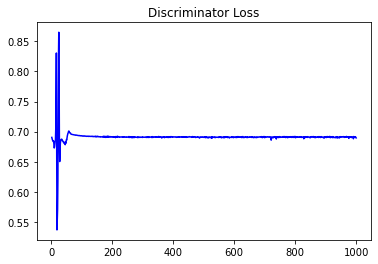

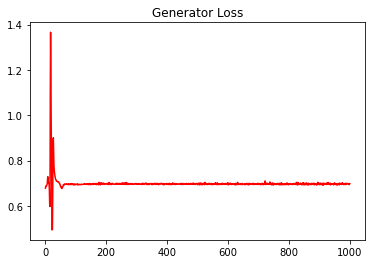

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4856315579733148


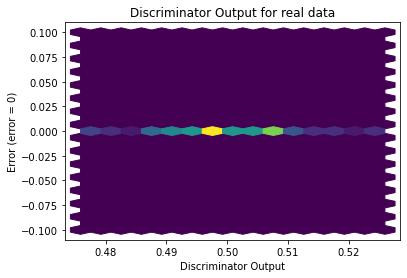

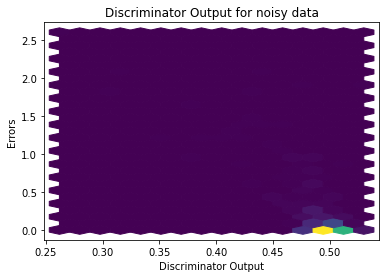

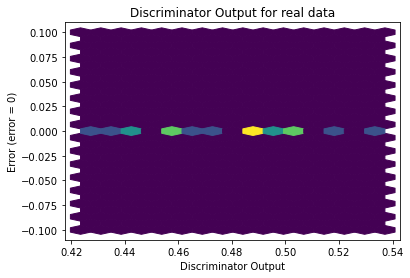

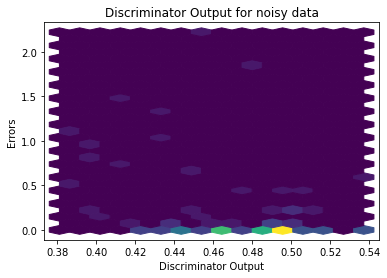

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


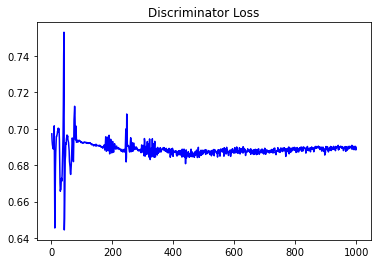

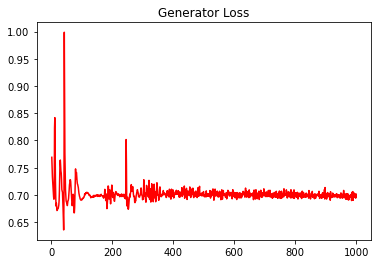

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.384001731291912


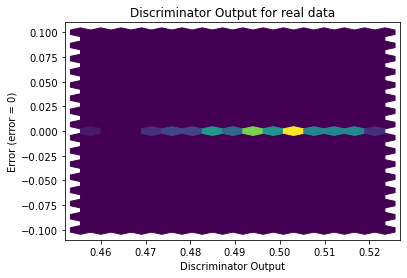

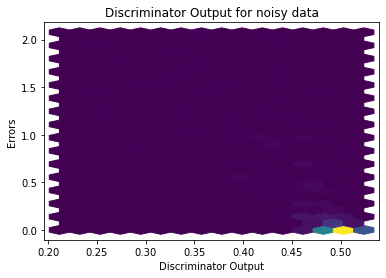

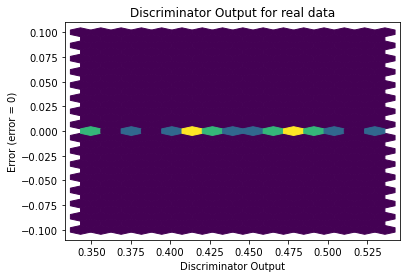

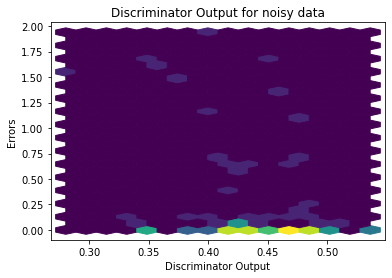

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6674]], requires_grad=True)
